# INFO
In this notebook, we will use k-means clustering to identify clusters on top of PCA components.

To do this, we will first use these principal components to the k-means algorithm and determine the best number of clusters, then we will analyze the clusters.

#### install plotly
for interactive plots

In [1]:
!conda install plotly=5.1.0 nbformat=5.1.3 --yes

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




#### import

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### load data

In [5]:
df = pd.read_pickle("../data/nutrition_survey/data_with_pca.pkl")

In [6]:
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,RIDSTATR,RIAGENDR,RIDAGEYR,...,SMDANY,SMAQUEX.y,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD140,WHQ150
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,5.897396,-10.253015,8.792921,2.208200,3.479974,-3.879677,-0.521180,2,1,69,...,1.0,2.0,69.0,180.0,3.0,3.0,210.0,NaN,270.0,62.0
73558,13.830025,12.525351,11.213923,0.702220,-0.903324,2.168469,4.427836,2,1,54,...,1.0,2.0,71.0,200.0,3.0,3.0,160.0,2.0,250.0,25.0
73559,6.722035,-1.840032,-1.957163,-4.283048,3.023512,0.401800,-2.876164,2,1,72,...,2.0,2.0,70.0,195.0,3.0,2.0,195.0,2.0,228.0,35.0
73560,-6.496596,2.269491,0.605488,2.677176,3.839537,0.174182,0.102453,2,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73561,4.973716,-5.726621,3.463663,1.851903,7.050696,0.809858,-0.347530,2,2,73,...,2.0,2.0,67.0,120.0,2.0,1.0,150.0,2.0,170.0,60.0


In [7]:
pca_columns = [x for x in df.columns if x.startswith("PCA")]
df[pca_columns].head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
SEQN,,,,,,,
73557,5.897396,-10.253015,8.792921,2.208200,3.479974,-3.879677,-0.521180
73558,13.830025,12.525351,11.213923,0.702220,-0.903324,2.168469,4.427836
73559,6.722035,-1.840032,-1.957163,-4.283048,3.023512,0.401800,-2.876164
73560,-6.496596,2.269491,0.605488,2.677176,3.839537,0.174182,0.102453
73561,4.973716,-5.726621,3.463663,1.851903,7.050696,0.809858,-0.347530


In [8]:
df[pca_columns].describe()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
count,1.017500e+04,1.017500e+04,1.017500e+04,1.017500e+04,1.017500e+04,1.017500e+04,1.017500e+04
mean,6.778962e-16,-2.149959e-16,-5.831753e-16,-1.007766e-16,4.950231e-16,7.741773e-16,2.539765e-16
std,6.589721e+00,4.992682e+00,4.278462e+00,3.277225e+00,3.181067e+00,2.946483e+00,2.656381e+00
min,-1.503876e+01,-1.813283e+01,-9.073109e+00,-9.813847e+00,-1.325346e+01,-1.270216e+01,-8.637589e+00
25%,-4.862492e+00,-2.770867e+00,-3.498171e+00,-2.356759e+00,-1.987074e+00,-1.597313e+00,-1.706247e+00
50%,1.403361e+00,-3.497392e-02,-8.564831e-01,2.508839e-02,1.564430e-01,-9.478822e-02,-3.567236e-01
75%,4.878300e+00,2.831875e+00,3.107175e+00,2.241357e+00,2.068674e+00,1.685878e+00,1.105737e+00
max,2.852607e+01,4.393273e+01,2.024711e+01,1.078348e+01,1.874279e+01,1.286913e+01,2.641839e+01


## CLUSTERING
**Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Clustering of unlabeled data can be performed with the module [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster).

### K-MEANS

![](./img/kmeans-steps.png)

The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.


![](./img/kmeans-animation.gif)

*Credits:* [https://towardsdatascience.com/into-to-pca-k-means-clustering-unsupervised-learning-algorithms-5cc5acea274d](https://towardsdatascience.com/into-to-pca-k-means-clustering-unsupervised-learning-algorithms-5cc5acea274d)


The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

![](./img/kmeans-inertia.jpg)
 
Inertia can be recognized as a measure of how internally coherent clusters are. 

It suffers from various drawbacks:
- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called *curse of dimensionality*). 
Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

###### PRO
- Fast / efficient
- Easy to understand
- Good results when the data are well separated from each other

###### CONS
- Requires apriori specification of the number of clusters (partially solved by inertia/silhouette_score *elbow method*)
- If there are two highly overlapping data, then k-means will not be able to resolve that there are two clusters
- Unable to handle noisy data and outliers
- Randomly choosing the cluster center can lead us to suboptimal results (partially solved by *k-means++* initialization)
- Applicable only when mean is defined, i.e., fails for categorical data

###### COMPARISON WITH OTHER CLUSTERING ALGORITHMS
[https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)

#### Inertia *Elbow Method*
Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka *inertia*, function of the number of clusters.

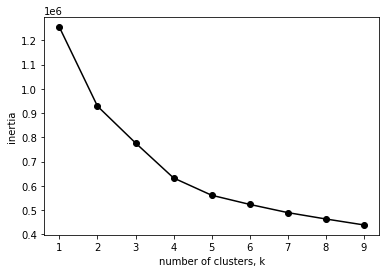

In [9]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42)
    
    # Fit model to samples
    model.fit(df[pca_columns])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Final K-Means Pipeline

In [10]:
K = 4

In [11]:
# Create a KMeans instance with k clusters: model
model = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42)

# Fit model to samples
model.fit(df[pca_columns])

KMeans(n_clusters=4, random_state=42)

In [12]:
labels=model.labels_
centers=model.cluster_centers_

In [13]:
df["cluster"] = labels

In [14]:
CLUSTER_COLORS = ["green", "yellow", "red", "orange"]

In [15]:
fig=go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=df["PCA1"],
        y=df["PCA2"],
        z=df["PCA3"],
        mode='markers',
        marker=dict(
            size=5,
            color=df["cluster"].apply(lambda i: CLUSTER_COLORS[i]),
            opacity=0.2
        ),
        name="clusters"
    )
)
fig.add_trace(
    go.Scatter3d(
        x=centers[:,0], 
        y=centers[:,1],
        z=centers[:,2],
        mode='markers',
        marker=dict(
            size=5,
            color="red"
        ),
        name='centroids'
    )
)
fig.show(renderer='iframe')

This Figure was made with Plotly and shows some clearly defined clusters in the data. 

I did not label the dataset, so we do not know the names of the clusters. This does not mean that we couldn’t go back and label these groups.

### CLUSTERS EXPLAINABILITY
Now that we know how many clusters there are in our data, we have a better sense of how many groups we can label the population with. 

As an example, it’s possible to come up with a model that grades well-being in this population on four grades.

The ability to notice otherwise unseen patterns and to come up with a model to generalize those patterns onto observations is precisely why tools like PCA and k-means are essential in any data scientist’s toolbox. They allow us to see the big picture while we pay attention to the details.

In [16]:
df["cluster"].value_counts()

1    3973
3    2641
0    2020
2    1541
Name: cluster, dtype: int64

In [17]:
PCA1_TOP_COLS = [
    "SIAPROXY", # proxy_respondent
    "BMXWT", # weight_kg
    "HSAQUEX", # health_status_source_data
    "BMXARML", # upper_arm_length
    "BMXARMC", # arm_circum
    "RIDAGEYR", # age
    "BMXWAIST" # waist_circum
]

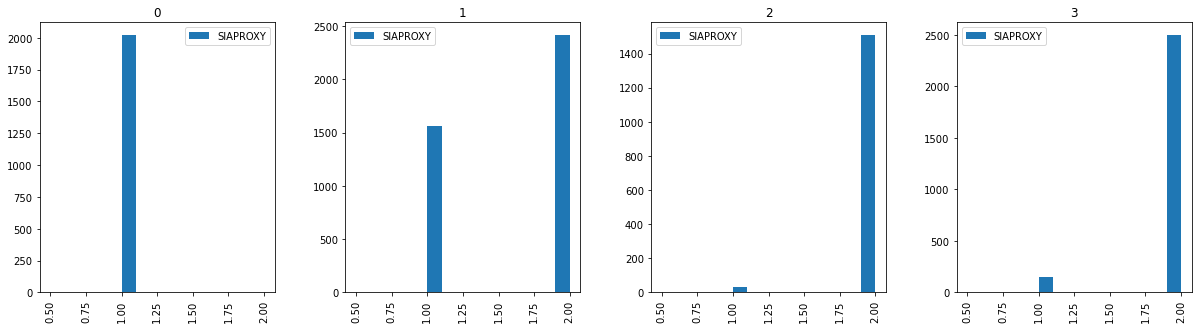

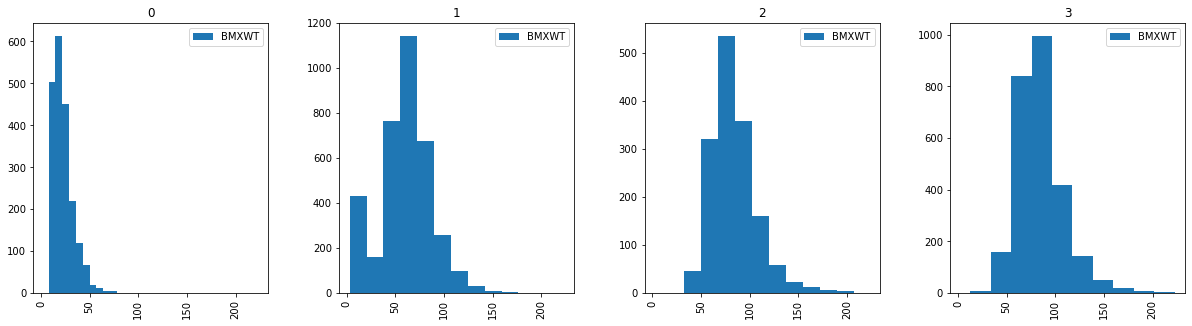

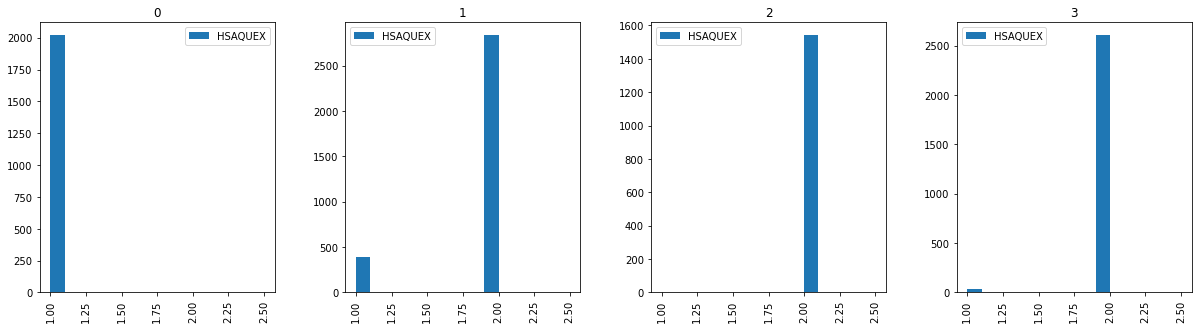

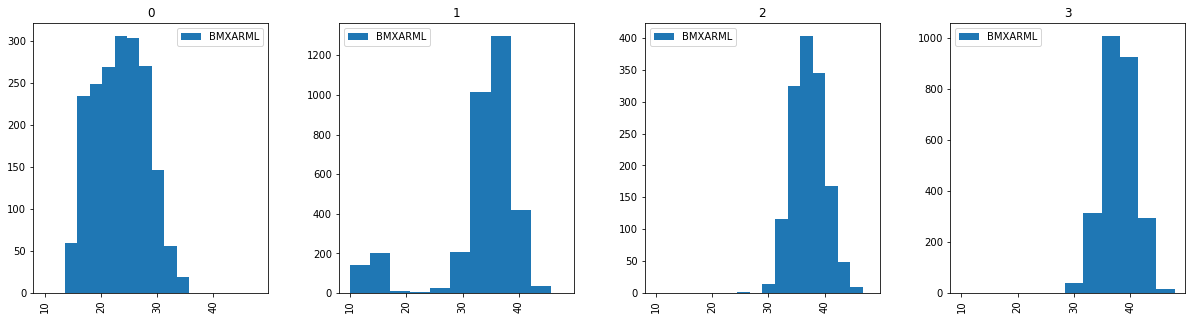

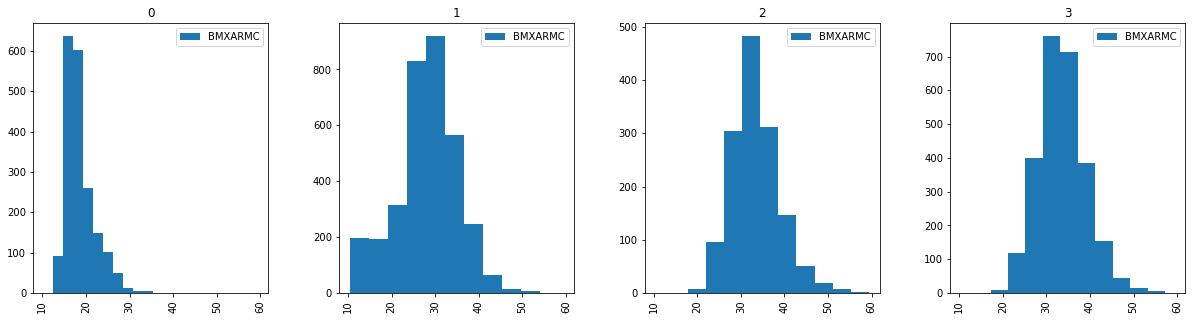

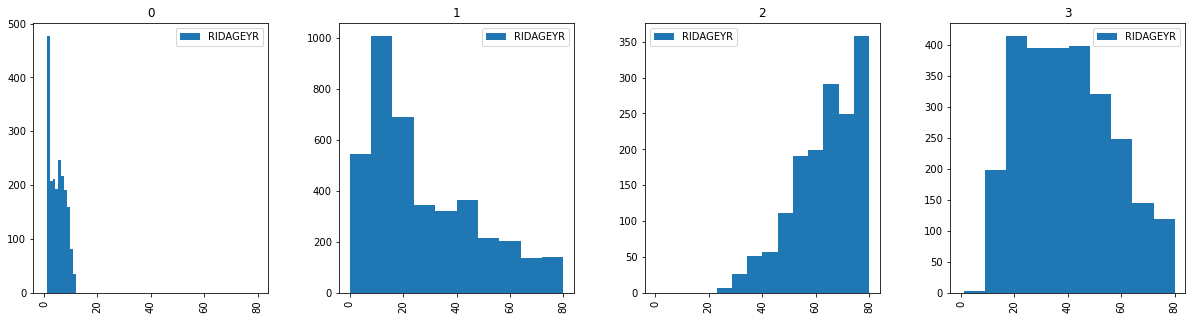

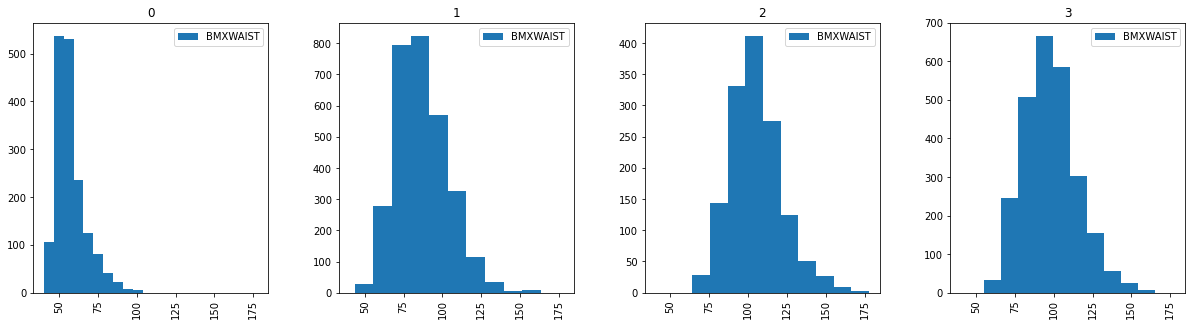

In [18]:
for c in PCA1_TOP_COLS:
    df.hist(c, by="cluster", sharex=True, layout=(1,4), figsize=(20,5), legend=True)
    plt.show()